<h1><center><span style="color:#00aaff">Import Necessary Libraries</span></center></h1>

In [120]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h1><center><span style="color:#00aaff">Class Implementation</span></center></h1>

In [121]:
class Image:
    #------------------------------------------------------
    def __init__(self, path_to_image: str) -> None:
        """
        Initialize the Image object with the image located at the given path.

        Parameters:
            path_to_image (str): The path to the image file.
        """
        self.image = cv2.imread(path_to_image)
    #------------------------------------------------------
    def show_img(self) -> None:
        """
        Display the image.
        """
        rgb_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
        plt.axis('off')
        plt.show()
    #------------------------------------------------------
    def save_img(self, name: str, path: str = '') -> None:
        """
        Save the image with the given name and path.

        Parameters:
            name (str): The name of the image file.
            path (str, optional): The path to save the image. Defaults to the current directory.
        """
        file_path = os.path.join(path, name + '.jpg')
        plt.imsave(file_path, self.image)
        print(f"Image saved at: {file_path}")
    #------------------------------------------------------
    def make_gray(self) -> None:
        """
        Convert the image to grayscale.
        """
        blue_channel = self.image[:, :, 0]
        green_channel = self.image[:, :, 1]
        red_channel = self.image[:, :, 2]

        gray_values = 0.114 * blue_channel + 0.587 * green_channel + 0.299 * red_channel

        gray_image = np.stack((gray_values, gray_values, gray_values), axis=-1)

        self.image = gray_image.astype(np.uint8)
    #------------------------------------------------------
    def invert_color(self) -> None:
        """
        Invert the colors of the image.
        """
        inverted_image = 255 - self.image
        self.image = inverted_image
    #------------------------------------------------------
    def adjust_brightness(self, factor: float) -> None:
        """
        Adjust the brightness of the image by a given factor.

        Parameters:
            factor (float): The brightness adjustment factor.
        """
        image_float = self.image.astype(np.float32)
        adjusted_image = image_float * factor
        adjusted_image = np.clip(adjusted_image, 0, 255)

        self.image = adjusted_image.astype(np.uint8)
    #------------------------------------------------------
    def rotate_image(self, degree: float, direction: str = 'counterclockwise') -> None:
        """
        Rotate the image by the given degree in the specified direction.

        Parameters:
            degree (float): The degree of rotation.
            direction (str, optional): The direction of rotation. Defaults to 'counterclockwise'.
                Can be either 'counterclockwise' or 'clockwise'.
        """
        angle_radians = np.radians(degree)
        height, width = self.image.shape[:2]
        center_x = width // 2
        center_y = height // 2
        cos_theta = np.cos(angle_radians)
        sin_theta = np.sin(angle_radians)
        rotation_matrix = np.array([[cos_theta, -sin_theta, (1 - cos_theta) * center_x + sin_theta * center_y],
                                    [sin_theta, cos_theta, (1 - cos_theta) * center_y - sin_theta * center_x]])

        if direction == 'counterclockwise':
            rotation_matrix = cv2.invertAffineTransform(rotation_matrix)

        rotated_image = cv2.warpAffine(self.image, rotation_matrix, (width, height))
        self.image = rotated_image
    #------------------------------------------------------
    def resize_image(self, scale_factor: float) -> None:
        """
        Resize the image by the given scale factor.

        Parameters:
            scale_factor (float): The scale factor for resizing.
        """
        height, width = self.image.shape[:2]
        new_height = int(height * scale_factor)
        new_width = int(width * scale_factor)
        scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0]])
        resized_image = cv2.warpAffine(self.image, scaling_matrix, (new_width, new_height))
        self.image = resized_image
    #------------------------------------------------------
    def mirror_image(self) -> None:
        """
        Mirror the image along the x-axis (horizontal axis).
        """
        height, width = self.image.shape[:2]

        reflection_matrix = np.array([[-1, 0, width - 1], [0, 1, 0]], dtype=np.float32)

        mirrored_image = cv2.warpAffine(self.image, reflection_matrix, (width, height))
        self.image = mirrored_image
    #------------------------------------------------------
    def edge_detection(self) -> None:
        """
        Perform edge detection on the image using matrix functions.
        """
        kernel_x = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

        kernel_y = np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]])

        gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

        edges_x = np.abs(cv2.filter2D(gray_image, -1, kernel_x))
        edges_y = np.abs(cv2.filter2D(gray_image, -1, kernel_y))

        edge_image = np.clip(edges_x + edges_y, 0, 255).astype(np.uint8)

        self.image = edge_image
    #------------------------------------------------------
    def built_in_edge_detection(self, threshold1: float, threshold2: float) -> None:
        """
        Perform edge detection on the image using the Canny edge detection algorithm.

        Parameters:
            threshold1 (float): The lower threshold for the hysteresis procedure.
            threshold2 (float): The upper threshold for the hysteresis procedure.
        """
        if len(self.image.shape) > 2 and self.image.shape[2] > 1:
            gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        else:
            gray_image = self.image.copy()

        edges = cv2.Canny(gray_image, threshold1, threshold2)

        color_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

        self.image = color_edges
    #------------------------------------------------------
    def apply_blur_filter(self):
        """
        Apply a blur filter to the image using a 5x5 kernel.

        The blur filter helps to reduce noise and smooth out the image.

        The function uses a kernel with all elements set to 1 divided by 25 (5x5 kernel size).
        The filter is applied using the cv2.filter2D function.

        Example:
            image.apply_blur_filter()
        """
        kernel = np.ones((5, 5), dtype=np.float32) / 25
        self.image = cv2.filter2D(self.image, -1, kernel)
    #------------------------------------------------------
    def apply_sharpen_filter(self):
        """
        Apply a sharpen filter to the image.

        The sharpen filter enhances the edges and details in the image.

        The function uses a specific 3x3 kernel for sharpening.
        The filter is applied using the cv2.filter2D function.

        Example:
            image.apply_sharpen_filter()
        """
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
        self.image = cv2.filter2D(self.image, -1, kernel)
    #------------------------------------------------------
    def apply_emboss_filter(self):
        """
        Apply an emboss filter to the image.

        The emboss filter creates a 3D effect by emphasizing the differences in pixel intensities.

        The function uses a specific 3x3 kernel for embossing.
        The filter is applied using the cv2.filter2D function.

        Example:
            image.apply_emboss_filter()
        """
        kernel = np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]], dtype=np.float32)
        self.image = cv2.filter2D(self.image, -1, kernel)
    #------------------------------------------------------
    def compute_histogram(self):
        """
        Compute and display the histogram of the image.

        The histogram represents the frequency distribution of pixel intensities in the image.

        The function uses the cv2.calcHist function to calculate the histogram.
        The histogram is flattened for plotting using the hist.flatten() method.
        The histogram is then plotted using matplotlib.pyplot.

        Example:
            image.compute_histogram()
        """
        hist = cv2.calcHist([self.image], [0], None, [256], [0, 256])
        hist = hist.flatten()  # Flatten the histogram array

        plt.figure()
        plt.title("Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.plot(hist)
        plt.show()
    #------------------------------------------------------
    def apply_box_blur(self, kernel_size: int):
        """
        Apply a box blur filter to the image.

        Args:
            kernel_size (int): Size of the kernel used for blurring.
        """
        blur_filter = np.ones((kernel_size, kernel_size), np.float64) / (kernel_size * kernel_size)
        self.image = cv2.filter2D(self.image, -1, blur_filter)
    #------------------------------------------------------
    def apply_sharpening_kernels(self, kernels: list) -> list:
        """
        Apply a list of sharpening kernels to the image.

        Args:
            kernels (list): List of sharpening kernels to apply.

        Returns:
            list: List of sharpened images.
        """
        sharpened_images = [self.image]
        for kernel in kernels:
            sharpened_image = cv2.filter2D(self.image, -1, kernel)
            sharpened_images.append(sharpened_image)
        return sharpened_images
    #------------------------------------------------------
    def adjust_saturation(self, saturation_factor: float):
        """
        Adjust the saturation of the image.

        Args:
            saturation_factor (float): Factor to adjust the saturation by.
        """
        # Convert the image to HSV color space
        image_hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)

        # Create a copy of the original image
        saturated_image = np.copy(image_hsv)

        # Convert the image to floating-point format
        saturated_image = saturated_image.astype(float)

        # Multiply the saturation channel by the saturation factor
        saturated_image[:, :, 1] *= saturation_factor

        # Clip the pixel values to ensure they remain within the valid range of 0-255
        saturated_image[:, :, 1] = np.clip(saturated_image[:, :, 1], 0, 255)

        saturated_image = saturated_image.astype(np.uint8)

        # Convert the image back to BGR color space
        saturated_image = cv2.cvtColor(saturated_image, cv2.COLOR_HSV2BGR)

        return saturated_image
    #------------------------------------------------------
    def split_channels(self) -> tuple:
        """
        Split the image into blue, green, and red channels.

        Returns:
            tuple: Tuple containing blue, green, and red channels.
        """
        # Split the channels
        b, g, r = cv2.split(self.image)

        # Create empty arrays for blue, green, and red channels
        blue_channel = np.zeros_like(self.image)
        green_channel = np.zeros_like(self.image)
        red_channel = np.zeros_like(self.image)

        # Assign the respective channel values
        blue_channel[:, :, 0] = b
        green_channel[:, :, 1] = g
        red_channel[:, :, 2] = r

        return blue_channel, green_channel, red_channel
    #------------------------------------------------------
    def adjust_hsv(self, hue_factor: float, saturation_factor: float, value_factor: float):
        """
        Adjust the hue, saturation, and value of the image.

        Args:
            hue_factor (float): Factor to adjust the hue by.
            saturation_factor (float): Factor to adjust the saturation by.
            value_factor (float): Factor to adjust the value by.

        Returns:
            numpy.ndarray: Adjusted image in BGR color space.
        """
        # Convert the image from BGR to HSV color space
        image_hsv = cv2.cvtColor(self.image, cv2.COLOR_BGR2HSV)

        # Adjust the hue, saturation, and value of the image
        image_hsv[:, :, 0] = image_hsv[:, :, 0] * hue_factor
        image_hsv[:, :, 1] = image_hsv[:, :, 1] * saturation_factor
        image_hsv[:, :, 2] = image_hsv[:, :, 2] * value_factor

        # Convert the image back to BGR color space
        enhanced_image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

        return enhanced_image
    #------------------------------------------------------

<h1><center><span style="color:#00aaff">Color Manipulation Methods</span></center></h1>

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


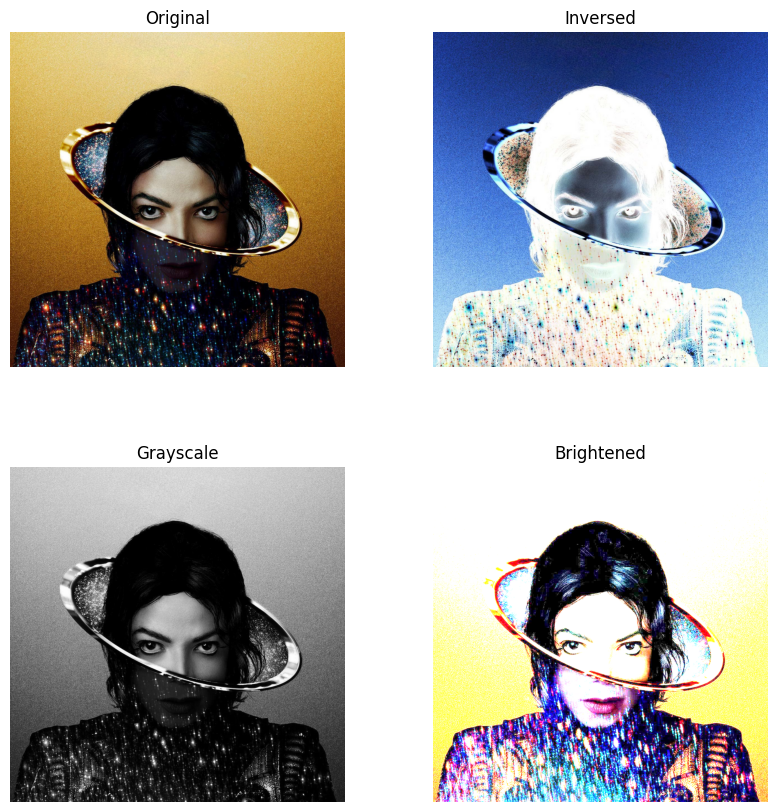

In [122]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Load and display the original image
image_normal = Image('MJ.jpg')
rgb_image_normal = cv2.cvtColor(image_normal.image, cv2.COLOR_BGR2RGB)
axes[0, 0].imshow(rgb_image_normal)
axes[0, 0].axis('off')
axes[0, 0].set_title('Original')

# Load, invert colors, and display the image
image_inversed = Image('MJ.jpg')
image_inversed.invert_color()
rgb_image_inversed = cv2.cvtColor(image_inversed.image, cv2.COLOR_BGR2RGB)
axes[0, 1].imshow(rgb_image_inversed)
axes[0, 1].axis('off')
axes[0, 1].set_title('Inversed')

# Load, convert to grayscale, and display the image
image_grayed = Image('MJ.jpg')
image_grayed.make_gray()
axes[1, 0].imshow(image_grayed.image, cmap='gray')
axes[1, 0].axis('off')
axes[1, 0].set_title('Grayscale')

# Load, adjust brightness, and display the image
image_brightened = Image('MJ.jpg')
image_brightened.adjust_brightness(10)
rgb_image_brightened = cv2.cvtColor(image_brightened.image, cv2.COLOR_BGR2RGB)
axes[1, 1].imshow(rgb_image_brightened)
axes[1, 1].axis('off')
axes[1, 1].set_title('Brightened')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# Show the figure
plt.show()

<h1><center><span style="color:#00aaff">Image Rotation Methods</span></center></h1>

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


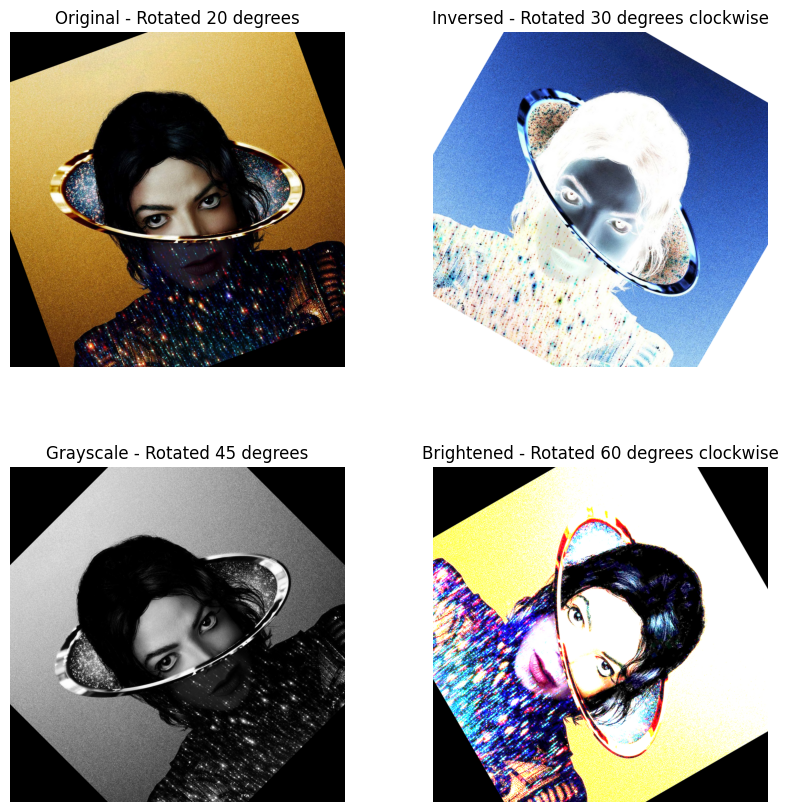

In [123]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Load and display the original image
image_normal = Image('MJ.jpg')
image_normal.rotate_image(20)
rgb_image_normal = cv2.cvtColor(image_normal.image, cv2.COLOR_BGR2RGB)
axes[0, 0].imshow(rgb_image_normal)
axes[0, 0].axis('off')
axes[0, 0].set_title('Original - Rotated 20 degrees')

# Load, invert colors, and display the image
image_inversed = Image('MJ.jpg')
image_inversed.rotate_image(30, direction='clockwise')
image_inversed.invert_color()
rgb_image_inversed = cv2.cvtColor(image_inversed.image, cv2.COLOR_BGR2RGB)
axes[0, 1].imshow(rgb_image_inversed)
axes[0, 1].axis('off')
axes[0, 1].set_title('Inversed - Rotated 30 degrees clockwise')

# Load, convert to grayscale, and display the image
image_grayed = Image('MJ.jpg')
image_grayed.rotate_image(45)
image_grayed.make_gray()
axes[1, 0].imshow(image_grayed.image, cmap='gray')
axes[1, 0].axis('off')
axes[1, 0].set_title('Grayscale - Rotated 45 degrees')

# Load, adjust brightness, and display the image
image_brightened = Image('MJ.jpg')
image_brightened.adjust_brightness(10)
image_brightened.rotate_image(60, direction='clockwise')
rgb_image_brightened = cv2.cvtColor(image_brightened.image, cv2.COLOR_BGR2RGB)
axes[1, 1].imshow(rgb_image_brightened)
axes[1, 1].axis('off')
axes[1, 1].set_title('Brightened - Rotated 60 degrees clockwise')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)

# Show the figure
plt.show()

<h1><center><span style="color:#00aaff">Image Mirroring Method</span></center></h1>

Invalid SOS parameters for sequential JPEG


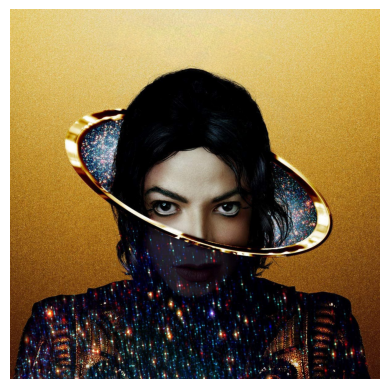

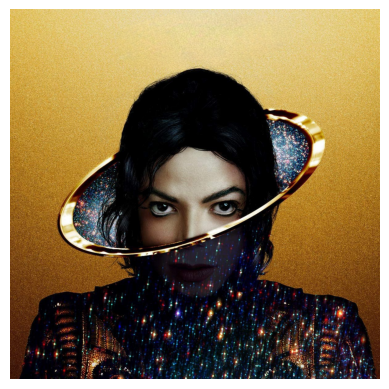

In [124]:
image = Image('MJ.jpg')
image.show_img()
image.mirror_image()
mirrored_image = image.show_img()

<h1><center><span style="color:#00aaff">Edge Detection Methods</span></center></h1>
<p>Edge detection is a fundamental technique in image processing that aims to identify the boundaries and sharp transitions between different objects or regions within an image. It plays a crucial role in various applications, including object recognition, image segmentation, and feature extraction. Edge detection algorithms aim to highlight these edges by identifying areas of significant intensity changes.</p>

<h3>Approaches for Edge Detection</h3>
<p>There are several approaches to perform edge detection:</p>

<ol>
  <li><strong>Gradient-Based Methods:</strong> Gradient-based edge detection methods leverage the concept of computing image gradients to identify areas of rapid intensity changes. These methods typically involve convolving the image with a set of gradient operators, such as Sobel, Prewitt, or Roberts operators, to estimate the gradient magnitude and direction. Edges are detected where the gradient magnitude exceeds a certain threshold.</li>
  
  <li><strong>Laplacian-Based Methods:</strong> Laplacian-based edge detection methods involve applying the Laplacian operator to the image to detect areas of high-frequency content. The Laplacian operator highlights regions where the second derivative of intensity is maximized. However, it also responds to noise, so additional processing steps, such as zero-crossing detection or thresholding, are often applied to refine the detected edges.</li>
  
  <li><strong>Canny Edge Detection:</strong> The Canny edge detection algorithm is a popular and widely used method due to its robustness and accuracy. It combines multiple stages to detect edges effectively. The steps include smoothing the image to reduce noise, computing gradient magnitudes and directions, suppressing non-maximum edges, and applying hysteresis thresholding to determine the final edges.</li>
</ol>

<h3>Edge Detection Methods</h3>
<p>Now, let's discuss the two specific edge detection methods you provided:</p>

<ol>
  <li><strong>Edge Detection using Matrix Functions:</strong> This method uses predefined kernels (matrix filters) to perform edge detection. Two kernels, <code>kernel_x</code> and <code>kernel_y</code>, are applied to the grayscale image using the <code>cv2.filter2D</code> function. These kernels capture horizontal and vertical intensity changes, respectively. The absolute values of the convolutions are taken and combined to obtain an edge image. This method provides control over the edge detection process and allows for fine-tuning by adjusting the kernel values.</li>
  
  <li><strong>Built-in Edge Detection using Canny Algorithm:</strong> This method utilizes the Canny edge detection algorithm provided by OpenCV. The input image is converted to grayscale if necessary, and then the <code>cv2.Canny</code> function is applied to detect edges based on the specified thresholds. The algorithm automatically handles various preprocessing steps, including noise reduction and thresholding, to produce the final edge image. The resulting edges are then converted back to a color image for visualization purposes.</li>
</ol>

<p>Both methods offer different advantages and can be suitable for different scenarios. The first method provides more flexibility in customizing the edge detection process, whereas the second method offers a convenient built-in solution with well-established performance characteristics.</p>

<p style="color:#00aaff;">Remember, the code snippets provided only highlight the key ideas and steps involved in each method without including the actual implementation details.</p>

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


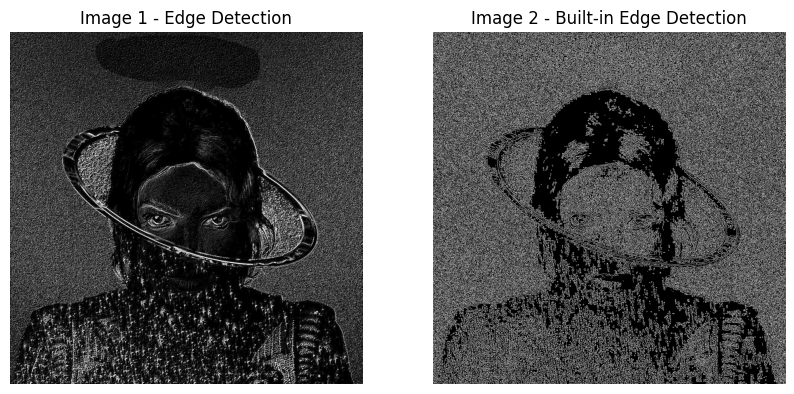

In [125]:
# Create the Image objects
image1 = Image('MJ.jpg')
image2 = Image('MJ.jpg')

# Apply edge detection to image1
image1.edge_detection()

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot image1
axes[0].imshow(image1.image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Image 1 - Edge Detection')

# Apply built-in edge detection to image2
image2.built_in_edge_detection(20, 30)

# Plot image2
axes[1].imshow(image2.image, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Image 2 - Built-in Edge Detection')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

<h1><center><span style="color:#00aaff">Filternig Methods: Box Bluring</span></center></h1>

<h3 style="color:#00aaff">blur_filter1:</h3>

<p>Size: 3x3</p>
<p>Values: np.ones((3, 3), np.float64) / 9.0</p>

<p>This kernel represents a simple averaging filter. Each element in the kernel has a value of 1/9, indicating that the filter takes the average of the pixel values in a 3x3 neighborhood. The resulting value represents the smoothed intensity at the center pixel of the neighborhood.</p>

<h3 style="color:#00aaff">blur_filter2:</h3>

<p>Size: 5x5</p>
<p>Values: np.ones((5, 5), np.float64) / 25.0</p>

<p>Similarly to blur_filter1, this kernel is also an averaging filter. Each element in the kernel has a value of 1/25, indicating that the filter takes the average of the pixel values in a larger 5x5 neighborhood. As a result, this filter produces a blur effect with a larger smoothing radius compared to blur_filter1.</p>

<h3 style="color:#00aaff">blur_filter3:</h3>

<p>Size: 7x7</p>
<p>Values: np.ones((7, 7), np.float64) / 49.0</p>

<p>This filter is again an averaging filter, but with a larger size. Each element in the kernel has a value of 1/49, indicating that the filter takes the average of the pixel values in a 7x7 neighborhood. Consequently, this filter produces an even stronger blur effect with a larger smoothing radius.</p>

Invalid SOS parameters for sequential JPEG


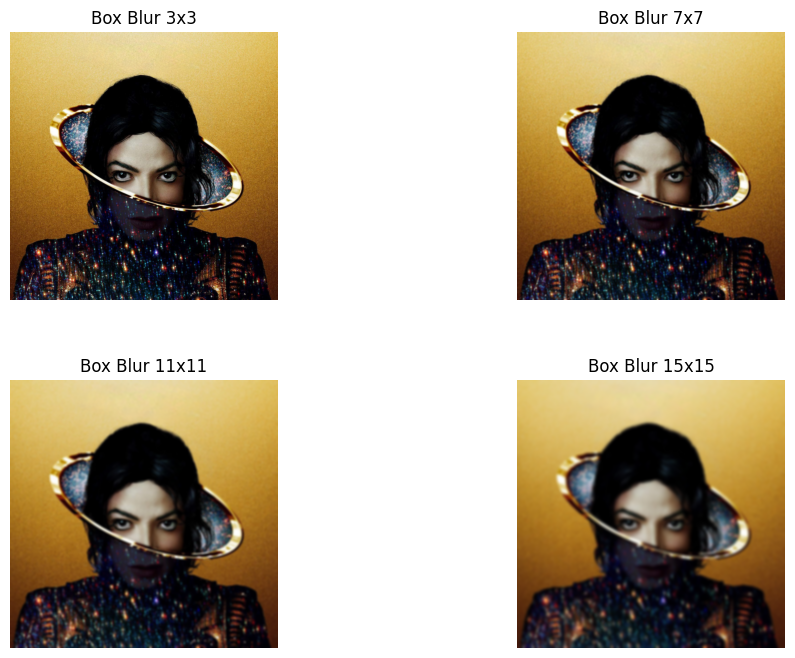

In [126]:
# Create an instance of the Image class
image = Image('MJ.jpg')

# Set the kernel sizes for box blur
kernel_sizes = [3, 7, 11, 15]

# Apply box blur with different kernel sizes
blurred_images = []
for kernel_size in kernel_sizes:
    image_copy = image.image.copy()
    image.apply_box_blur(kernel_size)
    blurred_images.append((kernel_size, image_copy, image.image))

# Display the images
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, (kernel_size, original_image, blurred_image) in enumerate(blurred_images):
    row = i // 2
    col = i % 2
    axes[row, col].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'Box Blur {kernel_size}x{kernel_size}')
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.show()


<h1><center><span style="color:#00aaff">Filternig Methods: Sharpening</span></center></h1>

<h4 style="color:#ffaa00">Laplacian Sharpening Kernel:</h4>

<p>The Laplacian sharpening kernel is given by:</p>

$$
Laplacian = \begin{bmatrix}
0 & 1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

<p>This kernel enhances edges and high-frequency details in the image by emphasizing the second derivatives of the image intensity. The central weight of 5 enhances the center pixel, while the surrounding weights contribute to the sharpening effect by accentuating the differences between neighboring pixels.</p>

<h4 style="color:#ffaa00">High Pass Sharpening Kernel:</h4>

<p>The high pass sharpening kernel is given by:</p>

$$
High Pass = \begin{bmatrix}
-1 & -1 & -1 \\
-1 & 9 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

<p>This kernel emphasizes the differences between adjacent pixels, resulting in sharpening of edges and fine details. The center weight of 9 enhances the overall intensity of the image, while the negative weights surrounding it contribute to the sharpening effect by subtracting the average intensity of neighboring pixels.</p>

<h4 style="color:#ffaa00">Unsharp Masking Kernel:</h4>

<p>The unsharp masking kernel is given by:</p>

$$
Unsharp Masking = \begin{bmatrix}
-1 & -1 & -1 \\
-1 & 17 & -1 \\
-1 & -1 & -1
\end{bmatrix}
\times 0.9
$$

<p>This kernel is a modified version of the high pass sharpening kernel. It further boosts the center pixel and reduces the weights of the surrounding pixels, resulting in a stronger sharpening effect. The division by 9 normalizes the kernel so that the sum of its elements is 1, which helps preserve the overall brightness of the image.</p>

Invalid SOS parameters for sequential JPEG


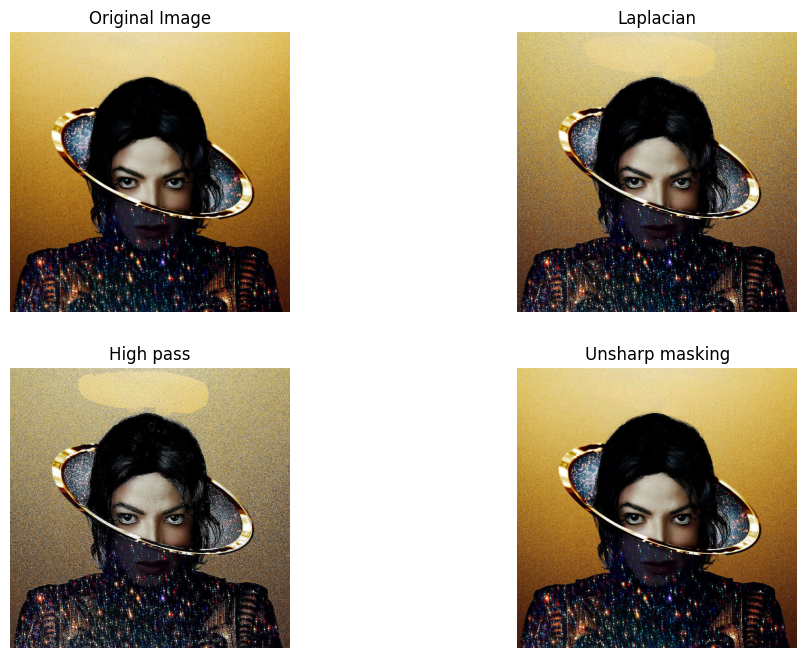

In [127]:
# Create an instance of the Image class
image = Image('MJ.jpg')

# Define the sharpening kernels
kernels = [
    np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),                      # Laplacian
    np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]),                 # High Pass
    np.array([[-1, -1, -1], [-1, 17, -1], [-1, -1, -1]]) / 9.0,          # Unsharp Masking
]

# Apply the sharpening kernels to the image
sharpened_images = image.apply_sharpening_kernels(kernels)

# Set the titles for display
titles = ["Original Image", "Laplacian", "High pass", "Unsharp masking"]

# Set the figure size
plt.figure(figsize=(12, 8))

# Display the images
count = len(sharpened_images)
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(sharpened_images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

# Show the plot
plt.show()

<h1><center><span style="color:#00aaff">Saturation Adjustments</span></center></h1>

<p>We first load the image and convert it to the HSV color space using cv2.cvtColor(). We then define a saturation_factor variable to control the extent of saturation adjustment. We create a copy of the original image in the HSV color space. We multiply the saturation channel (channel 1) by the saturation factor to increase or decrease the saturation. Afterward, we clip the pixel values of the saturation channel to ensure they remain within the valid range of 0-255.</p>

Invalid SOS parameters for sequential JPEG


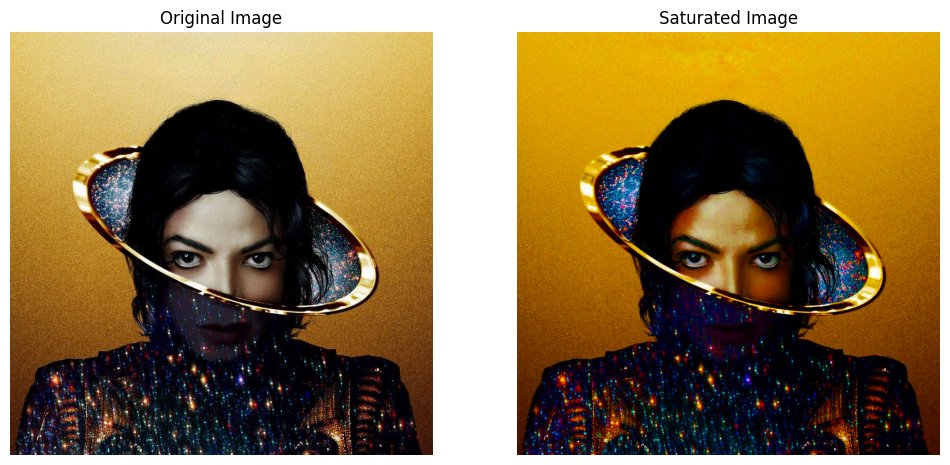

In [128]:
# Create an instance of the Image class
image = Image('MJ.jpg')

# Adjust saturation in the image
saturated_image = image.adjust_saturation(4) 

# Set the titles and images for display
titles = ["Original Image", "Saturated Image"]
images = [cv2.cvtColor(image.image, cv2.COLOR_BGR2RGB), cv2.cvtColor(saturated_image, cv2.COLOR_BGR2RGB)]
count = 2

# Set the figure size
plt.figure(figsize=(12, 6))

# Display the images
for i in range(count):
    plt.subplot(1, count, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

# Show the plot
plt.show()

<h1><center><span style="color:#00aaff">RGB Decomposition</span></center></h1>

Invalid SOS parameters for sequential JPEG


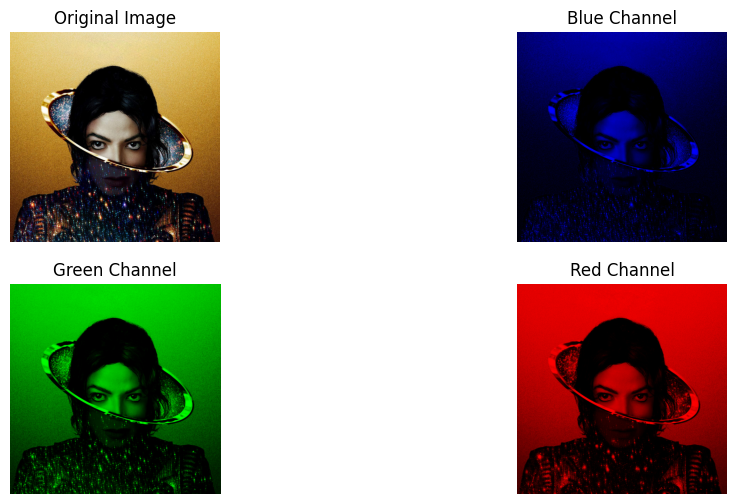

In [129]:
# Create an instance of the Image class
image = Image('MJ.jpg')

# Split the image into color channels
blue_channel, green_channel, red_channel = image.split_channels()

# Set the titles and images for display
titles = ["Original Image", "Blue Channel", "Green Channel", "Red Channel"]
images = [image.image, blue_channel, green_channel, red_channel]
count = len(images)

# Set the figure size
plt.figure(figsize=(12, 6))

# Display the images
for i in range(count):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

# Show the plot
plt.show()

<h1><center><span style="color:#00aaff">Image Enhancing Process</span></center></h1>

<h2 style="color:#00aaff;">General Approaches for Image Enhancing</h2>
<p style="color:#00aaff;">Image enhancing techniques aim to improve the visual quality and overall appearance of an image. There are several general approaches commonly used for image enhancing:</p>

<ol>
  <li><strong>Adjusting Brightness and Contrast:</strong> This approach involves modifying the intensity values of the image to control the overall brightness and contrast. Techniques such as histogram equalization, gamma correction, and adaptive contrast enhancement can be applied to enhance image details and improve visibility.</li>
  
  <li><strong>Sharpening and Edge Enhancement:</strong> Sharpening techniques emphasize the edges and fine details in an image. Unsharp masking, high-pass filtering, and edge enhancement filters can be used to enhance image clarity and improve perceived sharpness.</li>
  
  <li><strong>Color Correction and Color Enhancement:</strong> Color correction techniques are used to adjust the color balance, color cast, and overall color appearance of an image. White balance adjustment, color grading, and tone mapping are commonly employed to enhance the visual appeal and convey certain moods or atmospheres.</li>
  
  <li><strong>Noise Reduction:</strong> Noise reduction techniques aim to reduce unwanted noise or graininess in an image caused by factors such as sensor limitations or low lighting conditions. Filtering techniques, such as median filtering, Gaussian smoothing, and wavelet denoising, can be used to suppress noise while preserving important image details.</li>
  
  <li><strong>Image Enhancement in Frequency Domain:</strong> Frequency domain techniques, such as Fourier transform and wavelet transform, can be used for image enhancement. These approaches involve manipulating the image's frequency components to enhance specific features or remove unwanted artifacts.</li>
</ol>

<p style="color:#00aaff;">Image enhancing techniques can be applied individually or in combination to achieve the desired visual improvements. The choice of approach depends on the specific requirements and characteristics of the image, as well as the intended application or artistic vision.</p>

Invalid SOS parameters for sequential JPEG


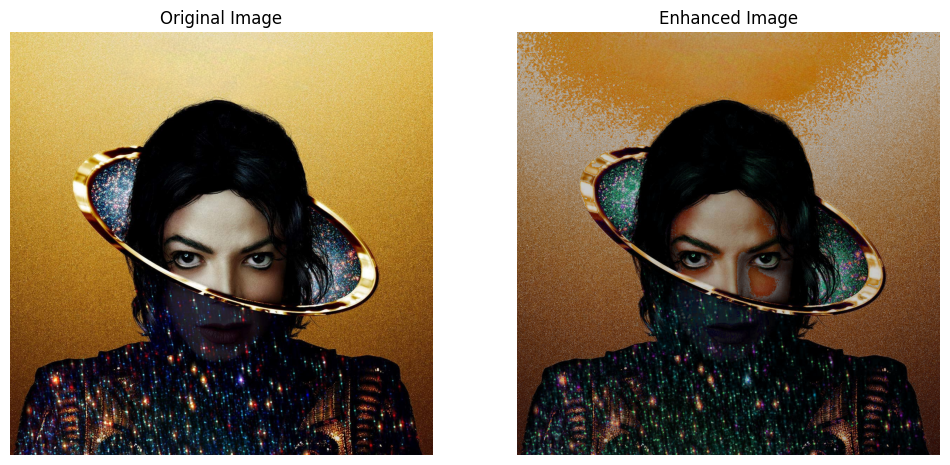

In [130]:
# Create an instance of the Image class
image = Image('MJ.jpg')

# Adjust the HSV values of the image
enhanced_image = image.adjust_hsv(0.8, 2, 0.8)

# Set the titles and images for display
titles = ["Original Image", "Enhanced Image"]
images = [image.image, enhanced_image]
count = len(images)

# Set the figure size
plt.figure(figsize=(12, 6))

# Display the images
for i in range(count):
    plt.subplot(1, count, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

# Show the plot
plt.show()